In [1]:
import pandas as pd
import numpy as np
import datetime
import string
import names
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Naila\\Desktop\\kulina-naila-fadhilah-project\\data-visualization'

In [3]:
pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

In [4]:
df = pd.read_csv(r"C:\Users\Naila\Desktop\kulina-naila-fadhilah-project\data-visualization\dataset.csv")
df.head()

,id,order_date,user_id
0,114363,2019-01-01,53424
1,114364,2019-01-01,77226
2,114366,2019-01-01,67632
3,114369,2019-01-01,63167
4,114370,2019-01-01,32047


In [5]:
df['order_date'] = pd.to_datetime(arg=df['order_date'], format='%Y-%m-%d')
df['OrderPeriod'] = df.order_date.apply(lambda x: x.strftime('%Y-%m'))
df.head()

,id,order_date,user_id,OrderPeriod
0,114363,2019-01-01,53424,2019-01
1,114364,2019-01-01,77226,2019-01
2,114366,2019-01-01,67632,2019-01
3,114369,2019-01-01,63167,2019-01
4,114370,2019-01-01,32047,2019-01


In [6]:
df.set_index('user_id', inplace=True)

df['CohortGroup'] = df.groupby(level=0)['order_date'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()

,user_id,id,order_date,OrderPeriod,CohortGroup
0,53424,114363,2019-01-01,2019-01,2019-01
1,77226,114364,2019-01-01,2019-01,2019-01
2,67632,114366,2019-01-01,2019-01,2019-01
3,63167,114369,2019-01-01,2019-01,2019-01
4,32047,114370,2019-01-01,2019-01,2019-01


In [7]:
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique user per Group + Period
cohorts = grouped.agg({'user_id': pd.Series.nunique})
cohorts.rename(columns={'user_id': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers
CohortGroup OrderPeriod            
2019-01     2019-01            4520
            2019-02            2093
            2019-03            1673
            2019-04            1342
            2019-05            1066

In [8]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  CohortPeriod
CohortGroup OrderPeriod                          
2019-01     2019-01            4520             1
            2019-02            2093             2
            2019-03            1673             3
            2019-04            1342             4
            2019-05            1066             5

In [9]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2019-01    4520
2019-02    2466
2019-03    2662
2019-04    2074
2019-05    2616
Name: TotalUsers, dtype: int64

In [10]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2019-01      1               4520
             2               2093
             3               1673
             4               1342
             5               1066
Name: TotalUsers, dtype: int64

In [11]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
CohortPeriod,,,,,,,,,,,,
1,4520.0,2466.0,2662.0,2074.0,2616.0,2802.0,3234.0,2080.0,1697.0,1622.0,1442.0,916.0
2,2093.0,1024.0,927.0,709.0,786.0,1200.0,1356.0,874.0,675.0,633.0,527.0,NaN
3,1673.0,611.0,588.0,541.0,560.0,667.0,902.0,602.0,473.0,405.0,NaN,NaN
4,1342.0,483.0,558.0,477.0,368.0,492.0,729.0,476.0,358.0,NaN,NaN,NaN
5,1066.0,494.0,518.0,333.0,292.0,428.0,610.0,395.0,NaN,NaN,NaN,NaN


In [12]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
CohortPeriod,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.463053,0.415247,0.348234,0.341851,0.300459,0.428266,0.419295,0.420192,0.397761,0.390259,0.365465,NaN
3,0.370133,0.247770,0.220887,0.260849,0.214067,0.238044,0.278912,0.289423,0.278727,0.249692,NaN,NaN
4,0.296903,0.195864,0.209617,0.229990,0.140673,0.175589,0.225417,0.228846,0.210961,NaN,NaN,NaN
5,0.235841,0.200324,0.194591,0.160559,0.111621,0.152748,0.188621,0.189904,NaN,NaN,NaN,NaN
6,0.265708,0.188159,0.143877,0.127290,0.094801,0.133476,0.150588,NaN,NaN,NaN,NaN,NaN
7,0.258407,0.140714,0.123967,0.112343,0.074541,0.105282,NaN,NaN,NaN,NaN,NaN,NaN
8,0.202876,0.114761,0.116078,0.098843,0.061544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.168805,0.102595,0.097671,0.081003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


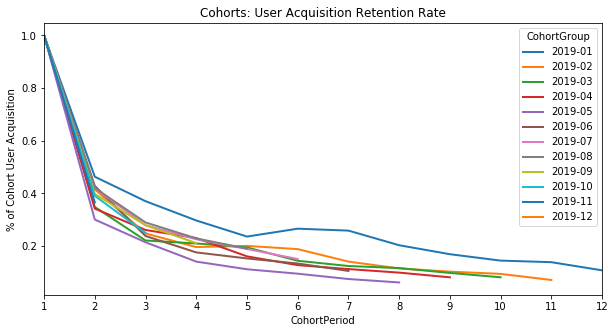

In [13]:
user_retention[['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10','2019-11', '2019-12']].plot(figsize=(10,5))
plt.title('Cohorts: User Acquisition Retention Rate')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort User Acquisition');

(12.0, 0.0)

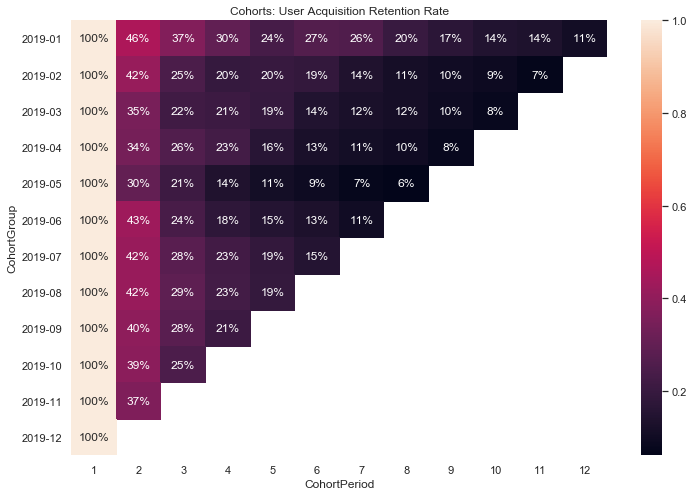

In [14]:
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Acquisition Retention Rate')
ax = sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [15]:
import sys
sys.version

'3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]'